# t-критерій Стьюдента для незалежних вибірок

##Теоретичні відомості

t-критерій Стьюдента для незалежних вибірок порівнює середні двох груп, щоб визначити, чи є статистичні достовірні докази того, що групи відрізняються. **Це параметричний тест.**


### Область застосування

t-критерій Стьюдента для незалежних вибірок використовується для:

* визначення статистичних відмінностей між середніми двох груп

*Примітка.* Даний тест може порівнювати середні лише для двох (і лише двох) груп. Він не може проводити порівняння більш ніж двох груп. 

### Вимоги до даних

Ваші дані повинні відповідати наступним вимогам:

1. Залежна змінна є кількісною і безперервною.
2. Незалежна змінна є категоріальною.
3. Немає взаємозв'язку між випробуванями у групах. Це означає що:
* суб'єкти в першій групі також не можуть бути у другій групі
* жоден суб'єкт в будь-якій групі не може впливати на суб'єктів в іншій групі
* жодна група не може впливати на іншу групу
Порушення цього припущення дасть неточне значення p
4. Вибірка даних є випадковою
5. Нормальний розподіл залежної (кількісної) змінної для кожної групи
* ненормальний розподіл значно знижує потужність (точність) тесту
* при дослідженні великих груп порушення нормальності все ще може дати точні значення p
6. Однорідність дисперсій. 
* коли це припущення порушено і розміри вибірки для кожної групи відрізняються, значення p не є надійним. В цьому випадку застосовують альтернативний тест, який назіваеться t тестом Велча. Даний тест ґрунтується на припущенні відмінних дисперсій сукупності. 
7. Дані не містять викидів. 

Дослідники також мають притримуватися кількох правил:

* Кожна група повинна мати щонайменше 6 спостережень, в ідеалі більше. 

* Збалансований дизайн (тобто однакова кількість спостережень у кожній групі). Групи, що мають значну відмінність в об'ємі можуть змінити достовірність отриманих результатів.

### Гіпотеза

Гіпотеза, яка перевіряєть даним тестом може бути виражена наступним чином:

$H_0 : μ_1  = μ_2$ («середні двох незалежних груп рівні»)

$H_1 : μ_1  ≠ μ_2$ («середні двох незалежних груп відмінні»)

або:

$H_0 : μ_1  - μ_2 = 0$ («різниця між середніми у незалежних групах за показником, що досліджується рівна 0»)

$H_1 : μ_1 -  μ_2$ ≠ 0 $ («різниця між середніми у незалежних групах за показником, що досліджується не рівна 0»)

Тут $μ_1$ - середнє значення змінної в першій групі; $μ_2$ - середнє значення змінної в першій групі.

### Алгоритм розрахунку

Зважаючи на те, що однією з вимог для використанная данного критерію є однорідність дисперсій перед проведенням t-критерію Стьюдента для незалежних вибірок необхідним є проведення тесту Лівеня.


#### Тест Лівеня для перевірки рівності дисперсій

Нульова гіпотеза для даного тесту визлядає наступним чином:

$$H_0: \sigma_1^2 = \sigma_2^2$$

Генеральні дисперсії оцінюються на основі вибірок, а сам критерій є відношенням однієї дисперсії до іншої:

$$F = \frac{\sigma_1^2}{\sigma_2^2}$$

При цьому на практиці в чисельнику розміщують більшу дисперсію, і знаменник - меншу.

Ступінь свободи для даного тесту розраховується окремо для кожної вибірки: 

$$df = n - 1 $$

За допомогою [таблиці критичних значень](https://drive.google.com/open?id=128lJvGOp013TuMF5Tcfr5Q2AC7FFvXEl)  знаходимо критичне значення. Якщо розраховане значення більше критичного - нульову гіпотезу відхиляють та роблять висновок про статистичну відмінність дисперсій. В протилежному випадку приймають нульову гіпотезу.


In [135]:
def livin(x, y, n):
    
    avgX=0
    avgY=0
    sumX=0
    sumY=0
    
    for i in range(n):
            sumX+=x[i]
            sumY+=y[i]
    avgX=sumX/n
    avgY=sumY/n
    
    difX=0
    difY=0
    for i in range(n):
        difX+=(x[i]-avgX)**2
        difY+=(y[i]-avgY)**2
    sdX=(difX/n)**(1/2)
    sdY=(difY/n)**(1/2)
    
    xl=pd.read_excel(r'C:\Git\BMD\laba №7/tab1.xlsx', sheet_name='Лист1')
    dfx=n-1
    dfy=n-1
    
    a=xl.f2
    b=xl.ff15
    for i in range(n):
        if dfx==a[i]:
            c=b[i];
    
    if sdX>sdY:
        f=(sdX**2)/(sdY**2)
    else:
        f=(sdY**2)/(sdX**2)
        
    print("Результат роботи тесту Лівеня: ")
     
    if c>f:
        print("відмінність статистично не значима: ", c, ">", f)
    else:
        print("відмінність статистично значима: ", c, "<", f)
        
    print("********************")
    return(c,f, sdX, sdY)
 

#### t критерій для незалежних вибірок

1. В залежності від того, чи підтвердується гіпотеза про рівність дисперсій застосовують один з двох підходів до роозрахунку криетрію для незалежних вибірок.

#### Припускається рівність дисперсій

Розрахунок t-критерію за формулою:

$$t = \frac{|M_1 - M_2|}{\sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}} $$

#### Рівність дисперсій не доведено

Розрахунок t-критерію за формулою:

$$t = \frac{|M_1 - M_2|}{\sqrt{\frac{(N_1 - 1)\sigma_1^2 + (N_2 - 1)\sigma_2^2}{N_1 + N_2 - 2}(\frac{1}{N_1}+\frac{1}{N_2})}} $$

Для обох формул:

$M_1, M_2$ - середньоарифметичне для двох груп

$\sigma_1, \sigma_2$ - стандартне відхилення

$N_1, N_2$ - кількість спостережень в вибірках


2. Визначаємо ступінь свободи:

$$ \,df = N_1 + N_2 - 2 $$

3. Визначаємо по [таблиці критичних значень t-Стьюдента](https://drive.google.com/open?id=12IEWx2mkE-2_jkMgkHwvUUlVfCcmH7Ub) критичне значення.

Якщо розраховане значення більше критичного - нульову гіпотезу відхиляють та роблять висновок про статистичну відмінність середніх. В протилежному випадку приймають нульову гіпотезу.


In [145]:
import pandas as pd

def student(x, y, n):
    
    sumX=0
    sumY=0
    c,f, sdX, sdY=livin(x,y,n)
    for i in range(n):
        sumX+=x[i]
        sumY+=y[i]
    mx=sumX/n
    my=sumY/n
    
    if c>f:
        t=abs(mx-my)/(((sdX**2)/n)-(sdY**2)/n)**(1/2)
    else:
        d1=(n-1)*sdX**2+(n-1)*sdY**2
        d2=(1/n)+(1/n)
        t=abs(mx-my)/(((d1/(n+n-2)))*d2)**(1/2)
    
    df=n+n-2
    
    xl=pd.read_excel(r'C:\Git\BMD\laba №7/tab2.xlsx', sheet_name='Лист1')
    
    l=0
    a=xl.dff
    b=xl.p
    n2=len(a)
    for i in range(n2):
        if a[i]==df:
            l=i
            
    print("Результат роботи t-критерію: ")
    print("Кількість ступенів свободи: ", df)

    if t>b[l]:
        print("присутня статистична відмінність середніх: ", t, ">", b[l])
    else:
        print("статистична відмінність середніх відсутня: ", t, "<", b[l])
    
   
    


## Завдання


# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 



In [141]:
import numpy as np
import pandas as pd

N=16

a1=abs(np.random.normal(20, 1, N))
a2=abs(np.random.normal(20, 3, N))

n1=np.round(a1)
n2=np.round(a2)

df=pd.DataFrame()
df['group1']=n1
df['group2']=n2

In [142]:
df.head()

,group1,group2
0,19.0,19.0
1,20.0,20.0
2,20.0,21.0
3,22.0,18.0
4,20.0,20.0


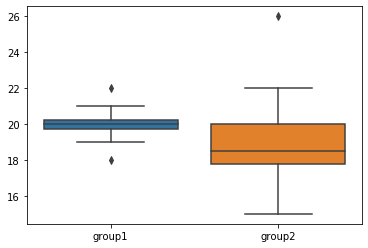

In [143]:
import seaborn as sns
%matplotlib inline

sns.boxplot(data=df)

In [146]:
student(n1, n2, N)

Результат роботи тесту Лівеня: 
відмінність статистично значима:  2.4 < 7.285714285714285
********************
Результат роботи t-критерію: 
Кількість ступенів свободи:  30
статистична відмінність середніх відсутня:  1.4855627054164149 < 2.042
